# Variación del _accuracy_ variando `N_train`

En esta notebook se grafican los resultados del experimento `expvocabulario.py`.

## Experimento

El objetivo del experimento es ver como varía el _accuracy_ del modelo al reducir el tamaño del set de entrenamiento, $N_{\mathrm{train}}$.

Para ello se tomaron distintas configuraciones de $k$ y $\alpha$ y se redujo el tamaño del set de entrenamiento preservando una relacion de 50/50 entre calificaciones positivas y negativas.

### Como correr el script:

Para correrlo se debe ejecutar:
```
$ python ./notebooks/expvocabulario.py
```
La salida del script se guarda en `./exp-vocabulario.csv`. Por prolijidad lo moví a `notebooks/results/accuracy-variando-n.csv`.

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Carga de datos:

data = pd.read_csv('results/accuracy-variando-n.csv')
data.head()

,n,k,alpha,acc
0,311,10,100,0.564303
1,311,50,100,0.552510
2,311,150,100,0.540558
3,311,100,10,0.565737
4,311,100,20,0.570199


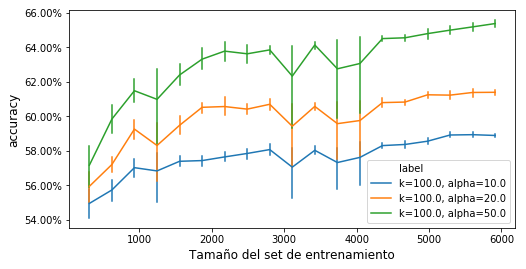

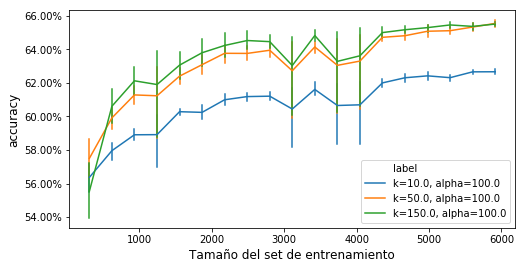

In [13]:
# Grafico de los datos:

def plot_subsampling_experiment(data, ax=None):
    
    data = data.copy()
    
    def fmt_param_label(row):
        'Genera el label para la fila basado en k, alpha'
        k = row['k']
        alpha = row['alpha']
        return f'k={k}, alpha={alpha}'
    
    data['label'] = data.apply(fmt_param_label, axis=1)
    
    ax = sns.lineplot(x='n', y='acc', hue='label', err_style='bars', data=data, ax=ax)
    ax.legend(loc='lower right')
    ax.set_xlabel('Tamaño del set de entrenamiento', fontsize=12)
    ax.set_ylabel('accuracy', fontsize=12)
    
    # Display Y tics as percentage:
    ax.set_yticklabels([f'{x:.2%}' for x in ax.get_yticks()])

_, ax = plt.subplots(1, 1, figsize=(8, 4))
plot_subsampling_experiment(data[data['k'] == 100], ax)
plt.savefig('plots/exp_subsampling_k_fijo.png')
plt.show()

_, ax = plt.subplots(1, 1, figsize=(8, 4))
plot_subsampling_experiment(data[data['alpha'] == 100], ax)
plt.savefig('plots/exp_subsampling_alpha_fijo.png')
plt.show()